In [1]:
#importing libraries
import pandas as pd
import os
import numpy as np
import tslib
import matplotlib.pyplot as plt
from fancyimpute import KNN   

#doing this to plot the graph in different window
import PyQt5
%matplotlib qt 

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
#loading the dataset
train= pd.read_csv("train.csv")

In [150]:
#checking data types
train.dtypes

In [3]:
#loading the continuous feature names in cont_features variable
features= [c for c in train.columns]
cont_features = [c for c in train.columns if c not in ['ID_code', 'target']]

In [4]:
#analysing the dataframe
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
#shape of the training dataframe
train.shape

(200000, 202)

In [6]:
#checking datatypes of each feature
data_type=train.dtypes
data_type.value_counts()
#we found that there are 200 continuous variables

float64    200
object       1
int64        1
dtype: int64

In [7]:
#describing the train df
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
train['target'].value_counts()
#We found that that there are more 0 in the target feature

0    179902
1     20098
Name: target, dtype: int64

## Missing Analysis

In [9]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train.isnull().sum())

# Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Features', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

In [10]:
#Analysing missing_val df
missing_val.head()

#total %age of missing values
total_sum= missing_val.Missing_percentage.isnull().sum()
print('Total percentage of missing values is {} '.format(total_sum))

Total percentage of missing values is 0 


## Outlier Analysis

In [11]:
#calculating quartiles
#taking backup in outlier data 
outlier_data= train.copy()   

#creating outlier_count to count outlier count in each variable
outlier_count= outlier_data.drop(["target", "ID_code"], axis=1)
Q1 = outlier_count.quantile(0.25)
Q3 = outlier_count.quantile(0.75)
IQR = Q3 - Q1

In [12]:
#outlier_count is a df which stores features and their respective Outlier count
outlier_count= ((outlier_data < (Q1 - 1.5 * IQR)) | (outlier_data > (Q3 + 1.5 * IQR))).sum()

outlier_count = pd.DataFrame(
    {'Feature': features,
     'Outlier Count': outlier_count,
    })

#because we want outlier count of only numeric variables
outlier_count=outlier_count.iloc[2:202, :]

#sorting in descending order
outlier_count= outlier_count.sort_values('Outlier Count', ascending= False)

#removing index
outlier_count.reset_index(drop=True, inplace=True)
# outlier_count

In [13]:
#total number of outliers
outlier_count['Outlier Count'].sum()

26536

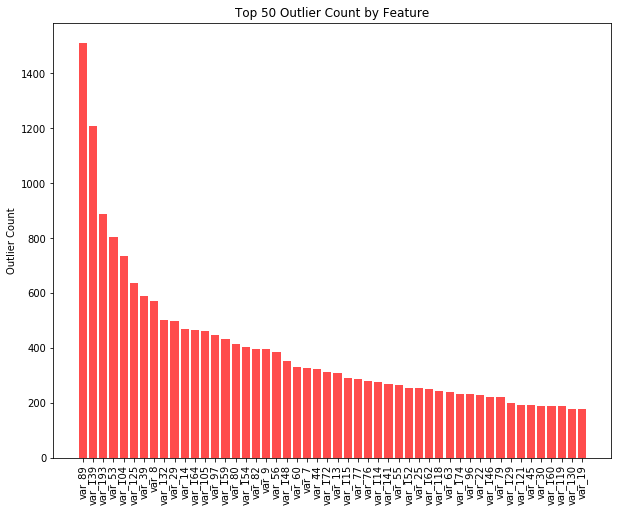

In [14]:
#plotting bargraph of top 50 outliers by feature
#plt.figure(figsize=(30,15))

top_50_outlier= outlier_count.head(n=50)
plt.figure(figsize=(10,8))
feature_len = np.arange(len(top_50_outlier['Feature']))

plt.bar(feature_len, top_50_outlier['Outlier Count'], align='center',alpha=0.7, color='r')
plt.xticks(feature_len, top_50_outlier['Feature'], rotation='vertical')
plt.ylabel('Outlier Count')
plt.title('Top 50 Outlier Count by Feature')
plt.show()

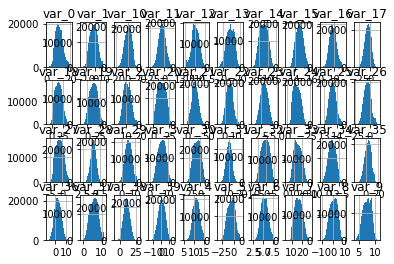

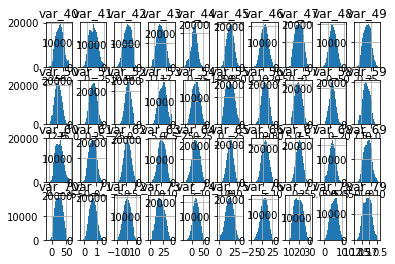

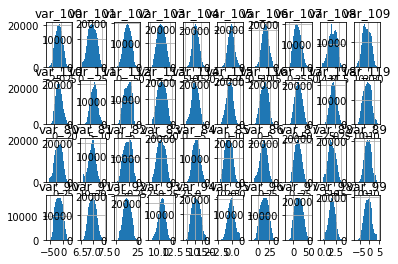

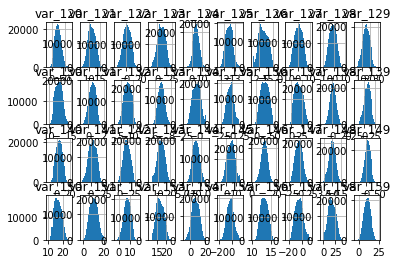

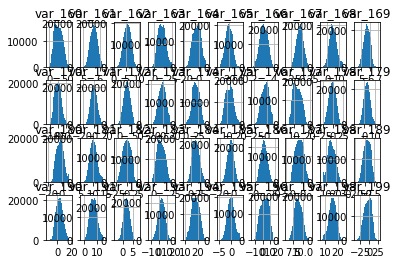

In [15]:
#checking the distribution of features
train.iloc[:,2:42].hist(bins=25,  layout=(4, 10));
train.iloc[:,42:82].hist(bins=25,  layout=(4, 10));
train.iloc[:,82:122].hist(bins=25,  layout=(4, 10));
train.iloc[:,122:162].hist(bins=25,  layout=(4, 10));
train.iloc[:,162:202].hist(bins=25,  layout=(4, 10));

## We can see that every feature is normally distributed, so we can impute/replace the outliers with mean values

In [16]:
#NOTE: We have a backup in the df i.e. outlier_data

In [17]:
#replacing outliers with NA 
#running loop from position 2 to 202 i.e taking only continuous variables into consideration

for i in range(2,202):
    q75, q25 = np.percentile(outlier_data.iloc[:,i], [75 ,25])
    iqr= q75- q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    outlier_data.loc[outlier_data[features[i]] < minimum, features[i]] = np.nan
    outlier_data.loc[outlier_data[features[i]] > maximum, features[i]] = np.nan

In [18]:
# We will replace the missing values with mean

# Replacing NaN with mean in only continuous var 
# NOTE: cont_features contain only cont features

outlier_mean_df=outlier_data[cont_features].fillna(outlier_data[cont_features].mean())

#adding target and ID back to outlier_mean_df 
outlier_mean_df['target']= outlier_data['target']
outlier_mean_df['ID_code']= outlier_data['ID_code']
outlier_data = outlier_mean_df[features]

In [19]:
#outlier_data is full data on which we have replace outliers with mean

# Feature Selection 

In [20]:
# Using Pearson Correlation to find out the important features
corr = outlier_data.corr(method='pearson')

# Correlation with output variable
cor_target = abs(corr["target"])

In [21]:
# Storing the important variable names in a list with name relevant_features
relevant_features = cor_target[cor_target>0.020]
relevant_features= relevant_features.index
relevant_features= list(relevant_features)

In [22]:
#printing relevant features
len(relevant_features)

124

In [23]:
#Storing the dataframe with only relevant features 
#dataframe with relevant features are stored relevant_feature_df

relevant_feature_df= outlier_data[relevant_features]

In [24]:
#plotting top 50 most important variables

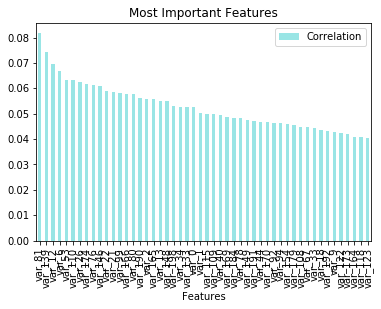

In [25]:
#plotting bar graph of important features
#converting cor_target to dataframe
cor_target_frame= cor_target.to_frame()

#setting indexes as a column 
cor_target_frame.index.name = 'features'
cor_target_frame.reset_index(inplace=True)

#renaming the columns
cor_target_frame.columns= ['Features','Correlation']

#sorting in decreasing order of 
cor_target_frame = cor_target_frame.sort_values('Correlation', ascending = False).reset_index(drop = True)

#removing top row as it contains target variable
cor_target_frame= cor_target_frame.drop([0])

#plotting most important top 50 features
top_50_variables= cor_target_frame.head(n=50)
top_50_variables.set_index("Features",drop=True,inplace=True)
top_50_variables.plot(kind='bar', title='Most Important Features',color='c', alpha=0.4);

## Applying Logistic Regression

In [26]:
#Applying logistic regression
#replacing 0 with No and 1 with yes

relevant_feature_df['target']= relevant_feature_df['target'].replace('No',0)
relevant_feature_df['target']= relevant_feature_df['target'].replace('Yes',1)

In [27]:
#Sampling
#dividing data into samples
sample_index= np.random.rand(len(relevant_feature_df))<0.8
train_sample= relevant_feature_df[sample_index]
test_sample= relevant_feature_df[~sample_index]

In [28]:
#Checking the distribution of target variable in train_sample
train_sample['target'].value_counts()

0    144182
1     16234
Name: target, dtype: int64

In [29]:
# Storing the independent col names in train_indep_cols
train_indep_cols= train_sample.columns[1:124]

In [30]:
#training the model
import statsmodels.api as sm
logit= sm.Logit(train_sample['target'], train_sample[train_indep_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.238312
         Iterations 8


In [31]:
#Predicting Test results with probability

test_sample['actual_prob']= logit.predict(test_sample[train_indep_cols])

In [32]:
#Converting Actual probability to 0 and 1 by threshold value of 0.5

test_sample['actual_val']=1
test_sample.loc[test_sample.actual_prob<0.5,"actual_val"]=0

In [33]:
#Calculating Confusion Matrix
CM=pd.crosstab(test_sample['target'], test_sample['actual_val'])
CM

actual_val,0,1
target,,
0,35259,461
1,2890,974


In [34]:
# assigning values from Confusion Matrix to variable to calculate the  metrics further
TN= CM.iloc[0,0]
FN= CM.iloc[1,0]
TP= CM.iloc[1,1]
FP= CM.iloc[0,1]

In [35]:
#Calculating Evaluation Metrics

Accuracy= ((TP+TN)*100)/(TP+TN+FP+FN)   

#classification Error
classification_error = ((FP + FN) / (TP + TN + FP + FN))*100

#False Negative Rate
FNR= (FN*100)/(FN+TP)

#True positive Rate/Recall/Sensitivity
TPR= (TP / (FN + TP))*100

#True Negative Rate/Specificity/
TNR= (TN / (TN + FP))*100

#False Positive Rate
FPR= (FP / (TN + FP))*100

#precision
precision = (TP / float(TP + FP))*100

#printing the metrics
print("Accuracy of the model is:" , round(Accuracy,2))
print("Classification error of the model is:", round(classification_error,2))
print("False Negative Rate of the model is:", round(FNR,2))
print("False Positive Rate of the model is:", round(FPR,2))
print("True Negative Rate of the model is:", round(TNR,2))
print("True Positive Rate of the model is:", round(TPR,2))
print("Precision of the model is:", round(precision,2))

Accuracy of the model is: 91.53
Classification error of the model is: 8.47
False Negative Rate of the model is: 74.79
False Positive Rate of the model is: 1.29
True Negative Rate of the model is: 98.71
True Positive Rate of the model is: 25.21
Precision of the model is: 67.87


## We are getting high False Negative score because the target data is imbalanced, so we will try undersampling and oversampling

In [36]:
#calculaing auc
from sklearn import metrics
auc=(metrics.roc_auc_score(test_sample['target'], test_sample['actual_prob']))
print(round(auc,3))

0.848


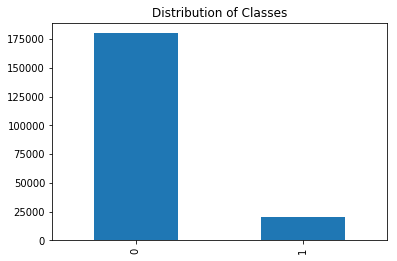

In [37]:
relevant_feature_df.target.value_counts().plot(kind='bar', title='Distribution of Classes');

# Sampling 

# doing undersampling

In [38]:
#Storing the count of number of records of class 1 in count_class_1 and count of number of records of class 0 in count_class_0
count_class_0, count_class_1 = outlier_data.target.value_counts()

#Storing the number of records where target value is 0 in df_class_0
#Storing the number of records where target value is 1 in df_class_1

df_class_0 = outlier_data[outlier_data['target'] == 0]
df_class_1 = outlier_data[outlier_data['target'] == 1]

In [39]:
df_class_0_under = df_class_0.sample(count_class_1)  #this will take randomly the amount of rows which class 1 has
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0) #this will make a df by combining df_class_0_under, df_class_1

In [40]:
#Storing the df with relevant features in df_test_under
df_test_under= df_test_under[relevant_features]

In [41]:
#doing random sampling and creating the train data(in train_sample) and the test data(in test_sample)
sample_index= np.random.rand(len(df_test_under))<0.8
train_sample= df_test_under[sample_index]
test_sample= df_test_under[~sample_index]

In [42]:
#Checking the distribution of target variable in train_sample
train_sample['target'].value_counts()

1    16036
0    16028
Name: target, dtype: int64

In [43]:
#Training the model

import statsmodels.api as sm
logit= sm.Logit(train_sample['target'], train_sample[train_indep_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.481881
         Iterations 6


In [44]:
#predicting test results
test_sample['actual_prob']= logit.predict(test_sample[train_indep_cols])

In [45]:
#Converting probabilities to 0 and 1 by threshold value of 0.5
test_sample['actual_val']=1
test_sample.loc[test_sample.actual_prob<0.5,"actual_val"]=0

In [46]:
#Creating Confusion Matrix
CM=pd.crosstab(test_sample['target'], test_sample['actual_val'])
CM

actual_val,0,1
target,,
0,3113,957
1,939,3123


In [47]:
# assigning values from Confusion Matrix to variable to calculate the  metrics further
TN= CM.iloc[0,0]
FN= CM.iloc[1,0]
TP= CM.iloc[1,1]
FP= CM.iloc[0,1]

In [48]:
#Calculating Metrics
#Accuracy
Accuracy= ((TP+TN)*100)/(TP+TN+FP+FN)   

#classification Error
classification_error = ((FP + FN) / (TP + TN + FP + FN))*100

#False Negative Rate
FNR= (FN*100)/(FN+TP)

#True positive Rate/Recall/Sensitivity
TPR= (TP / (FN + TP))*100

#True Negative Rate/Specificity/
TNR= (TN / (TN + FP))*100

#False Positive Rate
FPR= (FP / (TN + FP))*100

#precision
precision = (TP / float(TP + FP))*100

#printing the metrics
print("Accuracy of the model is:" , round(Accuracy,2))
print("Classification error of the model is:", round(classification_error,2))
print("False Negative Rate of the model is:", round(FNR,2))
print("False Positive Rate of the model is:", round(FPR,2))
print("True Negative Rate of the model is:", round(TNR,2))
print("True Positive Rate of the model is:", round(TPR,2))
print("Precision of the model is:", round(precision,2))

Accuracy of the model is: 76.68
Classification error of the model is: 23.32
False Negative Rate of the model is: 23.12
False Positive Rate of the model is: 23.51
True Negative Rate of the model is: 76.49
True Positive Rate of the model is: 76.88
Precision of the model is: 76.54


In [49]:
#calculaing auc
from sklearn import metrics
auc=(metrics.roc_auc_score(test_sample['target'], test_sample['actual_prob']))
print(round(auc,3))

0.846


# Doing over sampling

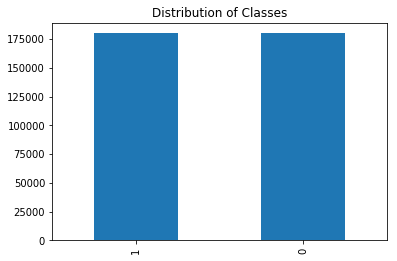

In [50]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

#Showing the distribution of target value by target
df_test_over.target.value_counts().plot(kind='bar', title='Distribution of Classes');

In [51]:
#Storing the df with relevant features
df_test_over= df_test_over[relevant_features]

In [52]:
#doing random sampling
sample_index= np.random.rand(len(df_test_over))<0.8
train_sample= df_test_over[sample_index]
test_sample= df_test_over[~sample_index]

In [53]:
train_sample['target'].value_counts()

0    144027
1    143998
Name: target, dtype: int64

In [54]:
#Training the model

import statsmodels.api as sm
logit= sm.Logit(train_sample['target'], train_sample[train_indep_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.478459
         Iterations 6


In [55]:
#Predicting the probability of test results
test_sample['actual_prob']= logit.predict(test_sample[train_indep_cols])

In [56]:
#Converting probabilities to 0 and 1
test_sample['actual_val']=1
test_sample.loc[test_sample.actual_prob<0.5,"actual_val"]=0

In [57]:
#Creating Confusion Matrix
CM=pd.crosstab(test_sample['target'], test_sample['actual_val'])
CM

actual_val,0,1
target,,
0,27744,8131
1,8372,27532


In [58]:
# assigning values from Confusion Matrix to variable to calculate the  metrics further
TN= CM.iloc[0,0]
FN= CM.iloc[1,0]
TP= CM.iloc[1,1]
FP= CM.iloc[0,1]

In [59]:
#calculating Metrics
#Accuracy
Accuracy= ((TP+TN)*100)/(TP+TN+FP+FN)   

#classification Error
classification_error = ((FP + FN) / (TP + TN + FP + FN))*100

#False Negative Rate
FNR= (FN*100)/(FN+TP)

#True positive Rate/Recall/Sensitivity
TPR= (TP / (FN + TP))*100

#True Negative Rate/Specificity/
TNR= (TN / (TN + FP))*100

#False Positive Rate
FPR= (FP / (TN + FP))*100

#precision
precision = (TP / float(TP + FP))*100

#printing the metrics
print("Accuracy of the model is:" , round(Accuracy,2))
print("Classification error of the model is:", round(classification_error,2))
print("False Negative Rate of the model is:", round(FNR,2))
print("False Positive Rate of the model is:", round(FPR,2))
print("True Negative Rate of the model is:", round(TNR,2))
print("True Positive Rate of the model is:", round(TPR,2))
print("Precision of the model is:", round(precision,2))

Accuracy of the model is: 77.01
Classification error of the model is: 22.99
False Negative Rate of the model is: 23.32
False Positive Rate of the model is: 22.66
True Negative Rate of the model is: 77.34
True Positive Rate of the model is: 76.68
Precision of the model is: 77.2


In [60]:
#AUC score
from sklearn import metrics
auc=(metrics.roc_auc_score(test_sample['target'], test_sample['actual_prob']))
print(round(auc,3))

0.851


# Decision Tree

In [61]:
#Actual Data

In [62]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [63]:
#Training on the unsampled data

In [64]:
#taking out the df with relevant features
relevant_feature_df= outlier_data[relevant_features]

In [65]:
#replacing 0 with No and 1 with yes
relevant_feature_df['target']= relevant_feature_df['target'].replace(1,'Yes')
relevant_feature_df['target']= relevant_feature_df['target'].replace(0,'No')

In [66]:
x= relevant_feature_df.iloc[:,1:124]   
y= relevant_feature_df.iloc[:,0]

In [67]:
#NOTE:
#x is the df with independent var
#y is the df with dependent var

In [68]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [69]:
#at first we have more data for "NO" target and less for "Yes" category
y_train.value_counts()

No     143881
Yes     16119
Name: target, dtype: int64

In [70]:
#NOTE:
#x_train= train data with indep var
#y_train= train data with dependent var 
#x_test= test data with indep var
#y_test= test data with dep var

In [71]:
#training the model
#applying C5.0 algorithm
clf= tree.DecisionTreeClassifier(criterion= "entropy").fit(x_train, y_train)

In [72]:
#predicting the test results
y_pred= clf.predict(x_test)

In [73]:
#predicting prob
# Actual class predictions
rf_predictions = clf.predict(x_test)

# Probabilities for each class
rf_probs = clf.predict_proba(x_test)[:, 1]

#calculating auc
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
roc_value = round(roc_value,2)
print("AUC Score is {}".format(roc_value))

AUC Score is 0.55


In [74]:
#creating dot file to visualize the tree
#We can also visualize this tree on the website webgraphviz.com
dotfile= open("pt.dot", "w")
df= relevant_feature_df.drop('target', axis=1)
df= tree.export_graphviz(clf, out_file=dotfile, feature_names= df.columns)

In [75]:
#Creating Confusion Matrix
CM = pd.crosstab(y_test, y_pred)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [77]:
#calculating Metrics
#Accuracy
Accuracy= ((TP+TN)*100)/(TP+TN+FP+FN)   

#classification Error
classification_error = ((FP + FN) / (TP + TN + FP + FN))*100

#False Negative Rate
FNR= (FN*100)/(FN+TP)

#True positive Rate/Recall/Sensitivity
TPR= (TP / (FN + TP))*100

#True Negative Rate/Specificity/
TNR= (TN / (TN + FP))*100

#False Positive Rate
FPR= (FP / (TN + FP))*100

#precision
precision = (TP / float(TP + FP))*100

#printing the metrics
print("Accuracy of the model is:" , round(Accuracy,2))
print("Classification error of the model is:", round(classification_error,2))
print("False Negative Rate of the model is:", round(FNR,2))
print("False Positive Rate of the model is:", round(FPR,2))
print("True Negative Rate of the model is:", round(TNR,2))
print("True Positive Rate of the model is:", round(TPR,2))
print("Precision of the model is:", round(precision,2))

Accuracy of the model is: 83.85
Classification error of the model is: 16.15
False Negative Rate of the model is: 80.67
False Positive Rate of the model is: 9.02
True Negative Rate of the model is: 90.98
True Positive Rate of the model is: 19.33
Precision of the model is: 19.13


In [78]:
#As we can see that we are getting high False Negative rate, so we will try over sampling

## Over Sampling

In [79]:
#taking out the df with relevant features
relevant_feature_df= outlier_data[relevant_features]

In [80]:
count_class_0, count_class_1 = relevant_feature_df.target.value_counts()

In [81]:
#Storing the number of records where target value is 0 in df_class_0
#Storing the number of records where target value is 1 in df_class_1

df_class_0 = relevant_feature_df[relevant_feature_df['target'] == 0]
df_class_1 = relevant_feature_df[relevant_feature_df['target'] == 1]

In [82]:
#Creating the df_test_over which includes oversampled data

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [83]:
df_test_over.target.value_counts()

1    179902
0    179902
Name: target, dtype: int64

In [84]:
#replacing 0 with No and 1 with yes
df_test_over['target']= df_test_over['target'].replace(1,'Yes')
df_test_over['target']= df_test_over['target'].replace(0,'No')

In [85]:
x= df_test_over.iloc[:,1:124]   
y= df_test_over.iloc[:,0]

In [86]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [87]:
#training the model
clf= tree.DecisionTreeClassifier(criterion= "entropy").fit(x_train, y_train)

In [88]:
#predicting the target variable on test data
y_pred= clf.predict(x_test)

In [89]:
#predicting prob
# Actual class predictions
rf_predictions = clf.predict(x_test)
# Probabilities for each class
rf_probs = clf.predict_proba(x_test)[:, 1]


#Calculating  roc_auc
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
roc_value = round(roc_value,2)
print('AUC score is {}'.format(roc_value))

AUC score is 0.94


In [90]:
#Creating Confusion Matrix
CM = pd.crosstab(y_test, y_pred)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [91]:
#calculating Metrics
#Accuracy
Accuracy= ((TP+TN)*100)/(TP+TN+FP+FN)   

#classification Error
classification_error = ((FP + FN) / (TP + TN + FP + FN))*100

#False Negative Rate
FNR= (FN*100)/(FN+TP)

#True positive Rate/Recall/Sensitivity
TPR= (TP / (FN + TP))*100

#True Negative Rate/Specificity/
TNR= (TN / (TN + FP))*100

#False Positive Rate
FPR= (FP / (TN + FP))*100

#precision
precision = (TP / float(TP + FP))*100

#printing the metrics
print("Accuracy of the model is:" , round(Accuracy,2))
print("Classification error of the model is:", round(classification_error,2))
print("False Negative Rate of the model is:", round(FNR,2))
print("False Positive Rate of the model is:", round(FPR,2))
print("True Negative Rate of the model is:", round(TNR,2))
print("True Positive Rate of the model is:", round(TPR,2))
print("Precision of the model is:", round(precision,2))

Accuracy of the model is: 94.38
Classification error of the model is: 5.62
False Negative Rate of the model is: 0.05
False Positive Rate of the model is: 11.2
True Negative Rate of the model is: 88.8
True Positive Rate of the model is: 99.95
Precision of the model is: 89.93


## Random Forest

## Actual Data

In [92]:
#taking out the df with relevant features
relevant_feature_df= outlier_data[relevant_features]

In [93]:
#replacing 0 with No and 1 with yes
relevant_feature_df['target']= relevant_feature_df['target'].replace(1,'Yes')
relevant_feature_df['target']= relevant_feature_df['target'].replace(0,'No')

In [94]:
x= relevant_feature_df.iloc[:,1:124]   
y= relevant_feature_df.iloc[:,0]

In [95]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [96]:
#at first we have more data for "NO" target and less for "Yes" category
y_train.value_counts()

No     143934
Yes     16066
Name: target, dtype: int64

In [97]:
#training the model

from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(x_train, y_train)

In [98]:
#predicting the test data
RF_predictions= RF_model.predict(x_test)

In [99]:
#Creating Confusion Matrix
CM = pd.crosstab(y_test, RF_predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [100]:
#calculating Metrics
#Accuracy
Accuracy= ((TP+TN)*100)/(TP+TN+FP+FN)   

#classification Error
classification_error = ((FP + FN) / (TP + TN + FP + FN))*100

#False Negative Rate
FNR= (FN*100)/(FN+TP)

#True positive Rate/Recall/Sensitivity
TPR= (TP / (FN + TP))*100

#True Negative Rate/Specificity/
TNR= (TN / (TN + FP))*100

#False Positive Rate
FPR= (FP / (TN + FP))*100

#precision
precision = (TP / float(TP + FP))*100

#printing the metrics
print("Accuracy of the model is:" , round(Accuracy,2))
print("Classification error of the model is:", round(classification_error,2))
print("False Negative Rate of the model is:", round(FNR,2))
print("False Positive Rate of the model is:", round(FPR,2))
print("True Negative Rate of the model is:", round(TNR,2))
print("True Positive Rate of the model is:", round(TPR,2))
print("Precision of the model is:", round(precision,2))

Accuracy of the model is: 89.98
Classification error of the model is: 10.02
False Negative Rate of the model is: 99.01
False Positive Rate of the model is: 0.04
True Negative Rate of the model is: 99.96
True Positive Rate of the model is: 0.99
Precision of the model is: 72.73


as we can see that we are getting high false negative rate, so we will try oversampling

## Oversampling

In [101]:
#taking out the df with relevant features
relevant_feature_df= outlier_data[relevant_features]

In [102]:
count_class_0, count_class_1 = relevant_feature_df.target.value_counts()

In [103]:
# Divide by class
df_class_0 = relevant_feature_df[relevant_feature_df['target'] == 0]
df_class_1 = relevant_feature_df[relevant_feature_df['target'] == 1]

In [104]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [105]:
#checking count of target variable in df_test_over
df_test_over['target'].value_counts()

1    179902
0    179902
Name: target, dtype: int64

In [106]:
#replacing 0 with No and 1 with yes
df_test_over['target']= df_test_over['target'].replace(1,'Yes')
df_test_over['target']= df_test_over['target'].replace(0,'No')

In [107]:
x= df_test_over.iloc[:,1:124]   
y= df_test_over.iloc[:,0]

In [108]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [109]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 50, max_depth=5).fit(x_train, y_train)

In [110]:
#predicting the test data
RF_predictions= RF_model.predict(x_test)

In [111]:
#Creating Confusion Matrix
CM = pd.crosstab(y_test, RF_predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [112]:
#calculating Metrics
#Accuracy
Accuracy= ((TP+TN)*100)/(TP+TN+FP+FN)   

#classification Error
classification_error = ((FP + FN) / (TP + TN + FP + FN))*100

#False Negative Rate
FNR= (FN*100)/(FN+TP)

#True positive Rate/Recall/Sensitivity
TPR= (TP / (FN + TP))*100

#True Negative Rate/Specificity/
TNR= (TN / (TN + FP))*100

#False Positive Rate
FPR= (FP / (TN + FP))*100

#precision
precision = (TP / float(TP + FP))*100

#printing the metrics
print("Accuracy of the model is:" , round(Accuracy,2))
print("Classification error of the model is:", round(classification_error,2))
print("False Negative Rate of the model is:", round(FNR,2))
print("False Positive Rate of the model is:", round(FPR,2))
print("True Negative Rate of the model is:", round(TNR,2))
print("True Positive Rate of the model is:", round(TPR,2))
print("Precision of the model is:", round(precision,2))

Accuracy of the model is: 68.79
Classification error of the model is: 31.21
False Negative Rate of the model is: 34.87
False Positive Rate of the model is: 27.57
True Negative Rate of the model is: 72.43
True Positive Rate of the model is: 65.13
Precision of the model is: 70.14


In [113]:
#AUC score
#predicting prob
# Actual class predictions
rf_predictions = RF_model.predict(x_test)
# Probabilities for each class
rf_probs = RF_model.predict_proba(x_test)[:, 1]


#doing auc
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
roc_value = round(roc_value,2)

In [114]:
print("AUC value is {}".format(roc_value))

AUC value is 0.76


## Naive Bayes

## Actual Data

In [115]:
#importing library
from sklearn.naive_bayes import GaussianNB

In [116]:
#taking out the df with relevant features
relevant_feature_df= outlier_data[relevant_features]

In [117]:
#replacing 0 with No and 1 with yes
relevant_feature_df['target']= relevant_feature_df['target'].replace(1,'Yes')
relevant_feature_df['target']= relevant_feature_df['target'].replace(0,'No')

In [118]:
x= relevant_feature_df.iloc[:,1:124]   
y= relevant_feature_df.iloc[:,0]

In [119]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [120]:
#at first we have more data for "NO" target and less for "Yes" category
y_train.value_counts()

No     143937
Yes     16063
Name: target, dtype: int64

In [121]:
#Naive Bayes implementation
NB_model = GaussianNB().fit(x_train, y_train)

In [122]:
#predicting test cases
NB_Predictions = NB_model.predict(x_test)

In [123]:
#Creating Confusion Matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [124]:
#calculating Metrics
#Accuracy
Accuracy= ((TP+TN)*100)/(TP+TN+FP+FN)   

#classification Error
classification_error = ((FP + FN) / (TP + TN + FP + FN))*100

#False Negative Rate
FNR= (FN*100)/(FN+TP)

#True positive Rate/Recall/Sensitivity
TPR= (TP / (FN + TP))*100

#True Negative Rate/Specificity/
TNR= (TN / (TN + FP))*100

#False Positive Rate
FPR= (FP / (TN + FP))*100

#precision
precision = (TP / float(TP + FP))*100

#printing the metrics
print("Accuracy of the model is:" , round(Accuracy,2))
print("Classification error of the model is:", round(classification_error,2))
print("False Negative Rate of the model is:", round(FNR,2))
print("False Positive Rate of the model is:", round(FPR,2))
print("True Negative Rate of the model is:", round(TNR,2))
print("True Positive Rate of the model is:", round(TPR,2))
print("Precision of the model is:", round(precision,2))

Accuracy of the model is: 92.06
Classification error of the model is: 7.94
False Negative Rate of the model is: 64.76
False Positive Rate of the model is: 1.56
True Negative Rate of the model is: 98.44
True Positive Rate of the model is: 35.24
Precision of the model is: 71.67


In [125]:
# Actual class predictions
nb_predictions = NB_model.predict(x_test)
# Probabilities for each class
nb_probs = NB_model.predict_proba(x_test)[:, 1]

In [126]:
#AUC score
from sklearn import metrics
auc=metrics.roc_auc_score(y_test, nb_probs)
auc= round(auc,2)
print("AUC score is {}".format(auc))

AUC score is 0.88


## Over Sampling

In [127]:
#taking out the df with relevant features
relevant_feature_df= outlier_data[relevant_features]

In [128]:
count_class_0, count_class_1 = relevant_feature_df.target.value_counts()

In [129]:
# Divide by class
df_class_0 = relevant_feature_df[relevant_feature_df['target'] == 0]
df_class_1 = relevant_feature_df[relevant_feature_df['target'] == 1]

In [130]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [131]:
#replacing 0 with No and 1 with yes
df_test_over['target']= df_test_over['target'].replace(1,'Yes')
df_test_over['target']= df_test_over['target'].replace(0,'No')

In [132]:
x= df_test_over.iloc[:,1:124]   
y= df_test_over.iloc[:,0]

In [133]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [134]:
#Naive Bayes implementation
NB_model_over = GaussianNB().fit(x_train, y_train)

In [135]:
#predict test cases
NB_Predictions_over = NB_model_over.predict(x_test)

In [136]:
#Creating Confusion Matrix
CM = pd.crosstab(y_test, NB_Predictions_over)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [137]:
#calculating Metrics
#Accuracy
Accuracy= ((TP+TN)*100)/(TP+TN+FP+FN)   

#classification Error
classification_error = ((FP + FN) / (TP + TN + FP + FN))*100

#False Negative Rate
FNR= (FN*100)/(FN+TP)

#True positive Rate/Recall/Sensitivity
TPR= (TP / (FN + TP))*100

#True Negative Rate/Specificity/
TNR= (TN / (TN + FP))*100

#False Positive Rate
FPR= (FP / (TN + FP))*100

#precision
precision = (TP / float(TP + FP))*100

#printing the metrics
print("Accuracy of the model is:" , round(Accuracy,2))
print("Classification error of the model is:", round(classification_error,2))
print("False Negative Rate of the model is:", round(FNR,2))
print("False Positive Rate of the model is:", round(FPR,2))
print("True Negative Rate of the model is:", round(TNR,2))
print("True Positive Rate of the model is:", round(TPR,2))
print("Precision of the model is:", round(precision,2))

Accuracy of the model is: 80.38
Classification error of the model is: 19.62
False Negative Rate of the model is: 20.46
False Positive Rate of the model is: 18.79
True Negative Rate of the model is: 81.21
True Positive Rate of the model is: 79.54
Precision of the model is: 80.9


In [138]:
# Probabilities for each class
nb_probs_over = NB_model_over.predict_proba(x_test)[:, 1]

In [139]:
#AUC score
from sklearn import metrics
auc=metrics.roc_auc_score(y_test, nb_probs_over)
auc= round(auc,2)
print("AUC score is {}".format(auc))

AUC score is 0.88


## Applying Naive Bayes as we got best score in Naive Bayes (on Oversampled Data)

In [140]:
test= pd.read_csv('test.csv')

In [141]:
#taking a backup of test df in test_copy
test_copy= test.copy()   

In [142]:
#extracting the data with only relevant features (i.e only 123 variables (NOTE:target variable should not be included))
relevant_features_test= relevant_features[1:124]
test_copy=test_copy[relevant_features_test]

In [143]:
NB_predictions_test= NB_model_over.predict(test_copy)

In [144]:
#adding NB predictions as target variable to test_copy
test['target']= NB_predictions_test

In [145]:
#converting Yes to 1 and No to 0
test['target']= test['target'].replace('No',0)
test['target']= test['target'].replace('Yes',1)

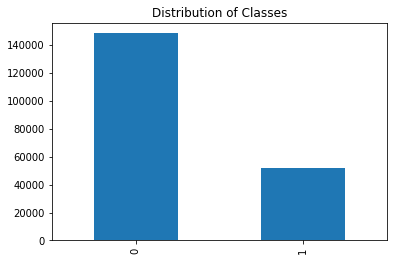

In [146]:
#Showing the distribution of target value by target
test.target.value_counts().plot(kind='bar', title='Distribution of Classes');

In [147]:
#count of distribution in target variable
test['target'].value_counts()

0    148361
1     51639
Name: target, dtype: int64

In [148]:
#saving the final test file with predicted values
test.to_csv('Test File with Predictions.csv')